In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf



In [22]:
data = 'malimg_dataset/malimg_paper_dataset_imgs'

In [23]:
familias = ImageDataGenerator().flow_from_directory(directory=data, target_size=(64,64), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [24]:
familias.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [25]:
def plot_images(image_batch, label_batch, class_indices, num_images=50):
    fig, axes = plt.subplots(10, 5, figsize=(20, 40))  
    axes = axes.flatten()
    for img, label, ax in zip(image_batch, label_batch, axes):
        ax.imshow(img)
        ax.axis('Off')
        class_label = class_indices[np.argmax(label)]
        ax.set_title(class_label)
    plt.tight_layout()
    plt.show()


In [26]:
images, labels = next(familias)

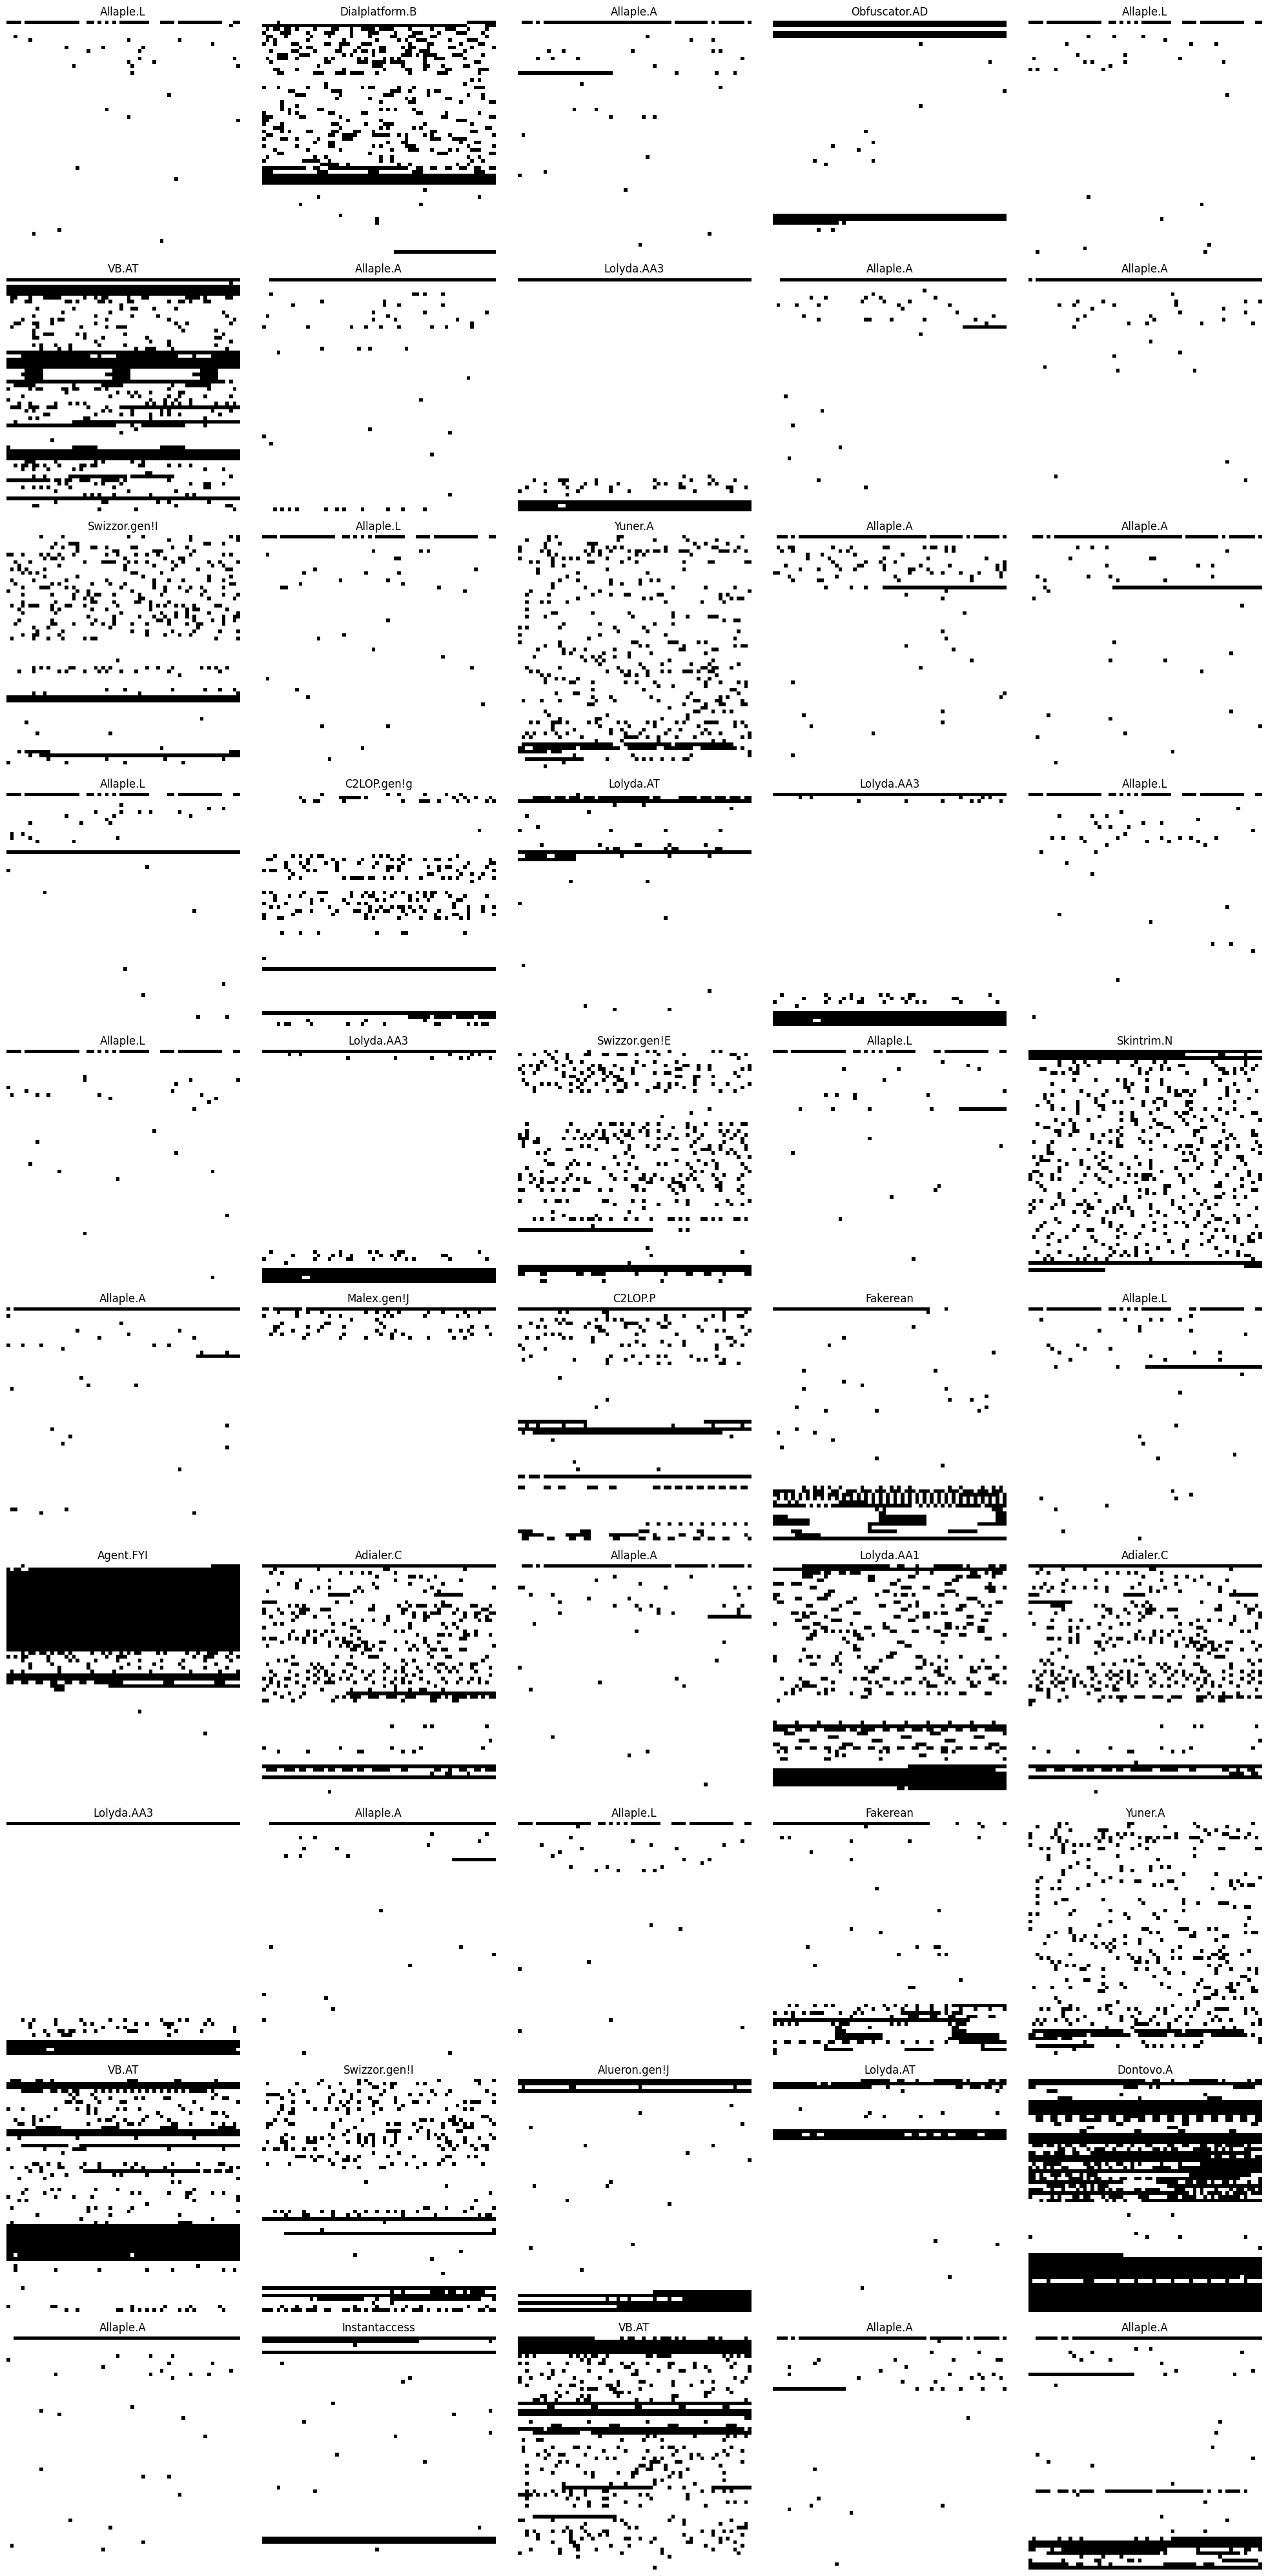

In [27]:
plot_images(images, labels, list(familias.class_indices.keys()))

In [28]:
import numpy as np
label_counts = np.sum(labels, axis=0)


class_names = list(familias.class_indices.keys())
class_indices = {v: k for k, v in familias.class_indices.items()}
sorted_class_names = [class_indices[i] for i in range(len(class_names))]


class_counts = dict(zip(sorted_class_names, label_counts))


print("Number of observations per class:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {int(count)}")


Number of observations per class:
Adialer.C: 122
Agent.FYI: 116
Allaple.A: 2949
Allaple.L: 1591
Alueron.gen!J: 198
Autorun.K: 106
C2LOP.P: 146
C2LOP.gen!g: 200
Dialplatform.B: 177
Dontovo.A: 162
Fakerean: 381
Instantaccess: 431
Lolyda.AA1: 213
Lolyda.AA2: 184
Lolyda.AA3: 123
Lolyda.AT: 159
Malex.gen!J: 136
Obfuscator.AD: 142
Rbot!gen: 158
Skintrim.N: 80
Swizzor.gen!E: 128
Swizzor.gen!I: 132
VB.AT: 408
Wintrim.BX: 97
Yuner.A: 800


In [29]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6537, 64, 64, 3)
X_test shape: (2802, 64, 64, 3)
y_train shape: (6537, 25)
y_test shape: (2802, 25)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(25, activation='softmax')  
    ])


    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


model = create_model()

model.summary()


C:\Users\alegu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │         6,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,197,977 (8.38 MB)

 Trainable params: 2,197,529 (8.38 MB)

 Non-trainable params: 448 (1.75 KB)

In [31]:
history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=20,  
    batch_size=32,  
    validation_data=(X_test, y_test),  
    verbose=1  
)


Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 30s 130ms/step - accuracy: 0.5980 - loss: 2.0840 - val_accuracy: 0.7598 - val_loss: 0.6224
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 26s 127ms/step - accuracy: 0.8996 - loss: 0.3065 - val_accuracy: 0.9493 - val_loss: 0.1429
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 26s 128ms/step - accuracy: 0.9426 - loss: 0.1850 - val_accuracy: 0.9707 - val_loss: 0.0865
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 29s 142ms/step - accuracy: 0.9563 - loss: 0.1277 - val_accuracy: 0.9736 - val_loss: 0.0923
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 29s 139ms/step - accuracy: 0.9687 - loss: 0.0879 - val_accuracy: 0.9736 - val_loss: 0.1062
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 28s 135ms/step - accuracy: 0.9686 - loss: 0.0919 - val_accuracy: 0.9743 - val_loss: 0.0757
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 28s 135ms/step - accuracy: 0.9670 - loss: 0.0926 - val_accuracy: 0.9750 - val_loss: 0.0840
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 28s 137ms/step - accuracy: 0.9674 - loss: 0

In [32]:
model.save("modelfinal.h5")

In [33]:
import tensorflow as tf
from art.attacks.extraction import CopycatCNN
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import TensorFlowV2Classifier

In [35]:
model = tf.keras.models.load_model('modelfinal.h5')

In [68]:
from art.estimators.classification import TensorFlowV2Classifier

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
classifier = TensorFlowV2Classifier(
    model=model,
    nb_classes=25,
    input_shape=(64, 64, 3),
    loss_object=tf.keras.losses.CategoricalCrossentropy(),
    clip_values=(0, 1),
    optimizer=optimizer
)


In [69]:
from art.attacks.evasion import FastGradientMethod


attack = FastGradientMethod(estimator=classifier, eps=0.1) 


X_test_adv = attack.generate(x=X_test) 


predictions = classifier.predict(X_test_adv)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print("Accuracy on adversarial examples: {:.2f}%".format(accuracy * 100))


Accuracy on adversarial examples: 97.61%


In [70]:
attack = FastGradientMethod(estimator=classifier, eps=0.3) 
X_test_adv = attack.generate(x=X_test)


In [71]:
from art.attacks.evasion import ProjectedGradientDescent
pgd_attack = ProjectedGradientDescent(estimator=classifier, eps=0.3, max_iter=5)
X_test_adv_pgd = pgd_attack.generate(x=X_test)


In [72]:
original_predictions = classifier.predict(X_test)
adversarial_predictions = classifier.predict(X_test_adv)


original_acc = np.mean(np.argmax(original_predictions, axis=1) == np.argmax(y_test, axis=1))
adversarial_acc = np.mean(np.argmax(adversarial_predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Original Accuracy: {original_acc * 100:.2f}%")
print(f"Adversarial Accuracy: {adversarial_acc * 100:.2f}%")

Original Accuracy: 97.68%
Adversarial Accuracy: 97.57%


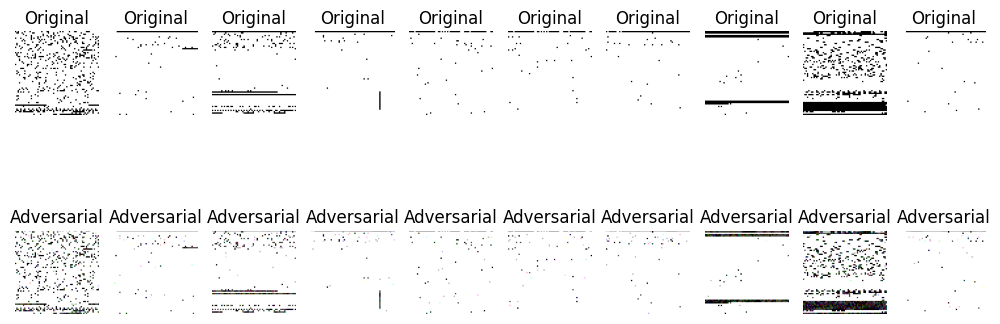

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(10):  
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(2, 10, i + 11)
    plt.imshow(X_test_adv_pgd[i], cmap='gray')
    plt.title("Adversarial")
    plt.axis('off')

plt.tight_layout()
plt.show()


Para llevar a cabo un ataque de evasión utilizando el método del Gradiente de Signo Rápido (Fast Gradient Method, FGM) y el Descenso del Gradiente Proyectado (Projected Gradient Descent, PGD) en modelos de aprendizaje profundo. Estos métodos son populares por su eficacia en la generación de ejemplos adversarios que pueden engañar a modelos de clasificación, desafiando la robustez del modelo.

Se comenzo configurando el entorno, luego se prepararo el modelo y los datos. Se inicializo el el ataque FGM especificando el estimtor y el eps, que determina la magnitude las perturbaciones aplicadas. Luego se utiliza el generate para crear imagenes adversarias a partir del "X_test", que son las imagenes modificadas para engañar al modelo.

In [51]:

score_clean = model.evaluate(x=X_test, y=y_test)


score_adv = model.evaluate(x=X_test_adv, y=y_test)

print(f"Clean test set loss: {score_clean[0]:.2f} vs adversarial test set loss: {score_adv[0]:.2f}")
print(f"Clean test set accuracy: {score_clean[1]:.2f} vs adversarial test set accuracy: {score_adv[1]:.2f}")

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9805 - loss: 0.1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9797 - loss: 0.1187
Clean test set loss: 0.13 vs adversarial test set loss: 0.12
Clean test set accuracy: 0.98 vs adversarial test set accuracy: 0.98


### Ataque de extraccion

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

copycat_attack = CopycatCNN(
    classifier=classifier,  # classifier es tu modelo original
    batch_size_fit=64,
    batch_size_query=64,
    nb_epochs=10,
    nb_stolen=1000
)

def create_thieved_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(25, activation='softmax')
    ])
    return model



In [61]:
stolen_model = TensorFlowV2Classifier(
    model=create_thieved_model(),
    nb_classes=25,
    input_shape=(64, 64, 3),
    loss_object=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam() 
)


stolen_classifier = copycat_attack.extract(
    x=X_test, 
    y=None, 
    thieved_classifier=stolen_model
)

C:\Users\alegu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:

victim_predictions = classifier.predict(X_test)
victim_accuracy = np.mean(np.argmax(victim_predictions, axis=1) == np.argmax(y_test, axis=1))
victim_loss = tf.keras.losses.categorical_crossentropy(y_test, victim_predictions)

print("Victim Model Accuracy: {:.2f}%".format(victim_accuracy * 100))
print("Victim Model Loss:", np.mean(victim_loss))


Victim Model Accuracy: 97.68%
Victim Model Loss: 0.10757274


In [64]:
#evalcacion del modelo robado

thieved_predictions = stolen_classifier.predict(X_test)
thieved_accuracy = np.mean(np.argmax(thieved_predictions, axis=1) == np.argmax(y_test, axis=1))
thieved_loss = tf.keras.losses.categorical_crossentropy(y_test, thieved_predictions)

print("Thieved Model Accuracy: {:.2f}%".format(thieved_accuracy * 100))
print("Thieved Model Loss:", np.mean(thieved_loss))


Thieved Model Accuracy: 91.76%
Thieved Model Loss: 0.5012745


In [65]:

print("\nComparison of Victim and Thieved Model Performances:")
print("Victim Model - Accuracy: {:.2f}%, Loss: {:.4f}".format(victim_accuracy * 100, np.mean(victim_loss)))
print("Thieved Model - Accuracy: {:.2f}%, Loss: {:.4f}".format(thieved_accuracy * 100, np.mean(thieved_loss)))



Comparison of Victim and Thieved Model Performances:
Victim Model - Accuracy: 97.68%, Loss: 0.1076
Thieved Model - Accuracy: 91.76%, Loss: 0.5013


La precisión del modelo es alta, por lo tanto el ataque de extraccion fue efectivo. El modelo robado ha logrado imitar bien al modelo original. Primero se tenía que definir el modelo thieven que es el que intenta imitar/robar la funcionalidad de mi modelo original. Como siguiente acto se debe configurar el ataque con ART y luego se especifican los parametros ; por ultimo se ejecuta el ataque con un conjunto de datos de entrada y el modelo victima genera las predicciones que el modelo thieved usara como etiquetas para aprender.

### DEFENSA 

In [73]:
from art.defences.trainer import AdversarialTrainer

trainer = AdversarialTrainer(classifier, [attack, pgd_attack])
trainer.fit(X_train, y_train, nb_epochs=5)


Adversarial training epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Adversarial training epochs: 100%|██████████| 5/5 [31:51<00:00, 382.35s/it]


In [74]:

original_predictions = classifier.predict(X_test)
original_acc = np.mean(np.argmax(original_predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Original Accuracy: {original_acc * 100:.2f}%")


X_test_adv_pgd = pgd_attack.generate(x=X_test)
adversarial_predictions_pgd = classifier.predict(X_test_adv_pgd)
adversarial_acc_pgd = np.mean(np.argmax(adversarial_predictions_pgd, axis=1) == np.argmax(y_test, axis=1))
print(f"Adversarial Accuracy (PGD): {adversarial_acc_pgd * 100:.2f}%")


Original Accuracy: 94.04%
Adversarial Accuracy (PGD): 94.61%


In [78]:
import numpy as np

def predict_with_noise(model, data, noise_level=0.01):
    predictions = model.predict(data)
    noise = np.random.normal(0, noise_level, predictions.shape)
    noisy_predictions = predictions + noise
    return np.argmax(noisy_predictions, axis=1)

# Uso de la función en la evaluación y durante el ataque
victim_noisy_predictions = predict_with_noise(classifier, X_test, noise_level=0.3)
victim_noisy_accuracy = np.mean(victim_noisy_predictions == np.argmax(y_test, axis=1))
print("Victim Model Accuracy with Noise: {:.2f}%".format(victim_noisy_accuracy * 100))


Victim Model Accuracy with Noise: 84.19%


In [79]:
stolen_classifier = copycat_attack.extract(
    x=X_test, 
    y=None, 
    thieved_classifier=stolen_model,
    preprocessing_defences=[predict_with_noise]  
)


In [80]:
thieved_predictions_noisy = stolen_classifier.predict(X_test)
thieved_accuracy_noisy = np.mean(np.argmax(thieved_predictions_noisy, axis=1) == np.argmax(y_test, axis=1))
print("Thieved Model Accuracy After Noise Defense: {:.2f}%".format(thieved_accuracy_noisy * 100))


Thieved Model Accuracy After Noise Defense: 93.47%


La adición de ruido es una técnica defensiva que se emplea para proteger un modelo contra extracciones no autorizadas o para minimizar el impacto de los ataques adversarios. Esto se hace con el afan de alterar respuesta del modelo antes de que sean enviadas o utilizadas. 